# 1. Creating and visualizing a graph

In [1]:
import networkx as nx

We have seen that there are different types of graphs, so there are different ways of creating them as well. The main options are summarized in the Table.

| constructor | Directed?  | Multiple edges?|
|-------------|-----------------------------|
| Graph       | No         |      No        |
| DiGraph     | Yes        |      No        |
| MultiGraph  | No         |      Yes       |
| MultiDiGraph| Yes        |      Yes       |

In [3]:
graph=nx.Graph()

A graph is made of a set of __nodes__ and __edges__. But if I tell you just the edges, it tells you the nodes as well. For example, if I say "make an edge between A and B" then you know that A and B are nodes. So to create a graph, you can do it by just adding edges. Note that it's not necessarily the most _efficient_ way to go, but certainly the most _convenient_.

In [4]:
graph.add_edge("Philippe","Sriram")
graph.add_edge("Philippe","Magda")
graph.add_edge("Sriram","Magda")
graph.add_edge("Magda","Sally")

Creating a graph by listing edges doesn't work in one case: if a node is part of the graph but not connected to anybody else.

In [5]:
graph.add_node("Peter")

To visualize the graph, you need to state %matplotlib inline, or else the visualization will not show. Note that there are different ways to render a graph, and we'll discuss that later.

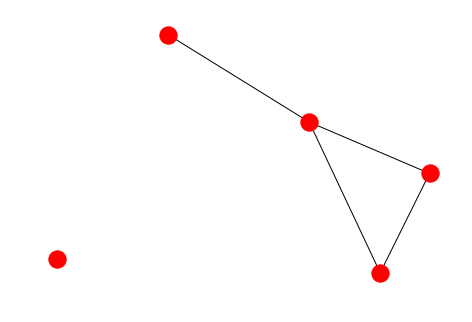

In [40]:
%matplotlib inline
nx.draw(graph)

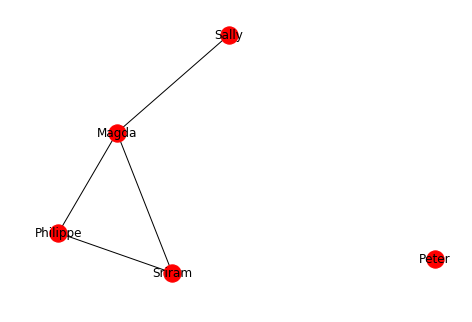

In [41]:
%matplotlib inline
nx.draw(graph, with_labels = True)

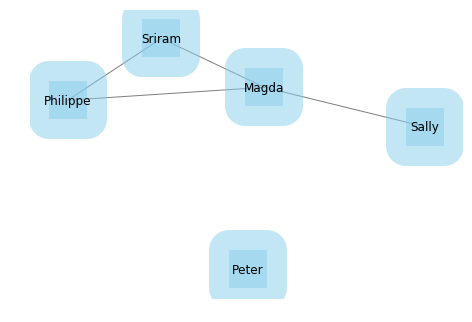

In [47]:
%matplotlib inline
nx.draw(graph, with_labels=True, node_size=1500, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40)

# 2. Data structures behind a graph
## 2.1 Lists

A graph has a __list__ of nodes and a __list__ of edges. If you query it, that's what you get. You can also create it from a list of edges directly rather than entering each edge one by one.

In [8]:
graph.edges()

[('Philippe', 'Sriram'),
 ('Philippe', 'Magda'),
 ('Sriram', 'Magda'),
 ('Magda', 'Sally')]

In [9]:
graph.nodes()

['Philippe', 'Sriram', 'Magda', 'Sally', 'Peter']

In [10]:
#Let's create another graph by providing the list of edges
graph2=nx.Graph()
graph2.add_edges_from([ ("Philippe","George"), ("Philippe","Eric"), 
                       ("Eric","Magda"), ("Eric","Sriram")])

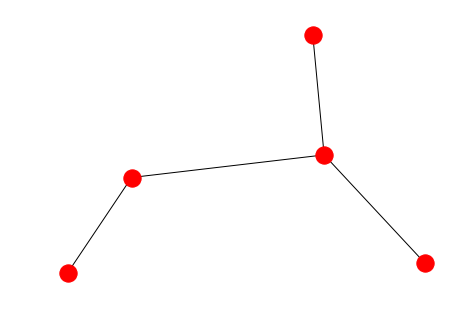

In [12]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
nx.draw(graph2)

Many operations can be done on list. You can apply them to either the list of edges, or the list of nodes.

|    syntax       | meaning                    | example    |
|-----------------|----------------------------|------------|
| =[]             | creates a new, empty list  | L=[]       |
| =[4,1]          | creates a list with content| L=[4,1]    |
| len(L)          | Number of elements in list | len(L)     |
| L[0]=           | Changes the 1st element    | L[0]=5     |
| L.append(..x..) | Adds __one__ element       | L.append(4)|
| x in L          | Checks if element x is in L| 4 in L     |

How do we ask for the number of edges?

In [14]:
len(graph.edges())

4

How can we grab the first half of them?

In [16]:
graph.edges()[:2]

[('Philippe', 'Sriram'), ('Philippe', 'Magda')]

Is there a node named Philippe?

In [17]:
'Philippe' in graph.nodes()

True

Even slightly more complicated operations can be written quickly. For instance, if we want the first 2 nodes by alphabetical ordering:

In [24]:
sorted(graph.nodes())[:2]

['Magda', 'Peter']

There are slight tricks behind that. Python has __two__ ways to sort lists:
* _sorted_, which is a function to which you give an iterable collection. It will not modify the collection but rather created a new, sorted one.
* _.sort()_, which is a function that lists have. For example, L.sort(). However, it sorts the list itself (i.e. 'in place'). NetworkX allows us to access the lists but not to mess with them so we cannot use that.

## 2.2. HashMaps

![Image of HashMap](https://cdn.guru99.com/images/uploads/2012/12/java11.jpg)

In [25]:
#![Image of HashMap](https://cdn.guru99.com/images/uploads/2012/12/java11.jpg)

You can associate information with either nodes or edges. It is called the __attributes__ of the node/edge. Attributes are internally stored using hashmaps, i.e. associative arrays / key-value pairs.

In [26]:
G=nx.Graph()
G.add_nodes_from([1,2,3],color='red')
nx.get_node_attributes(G,'color')

{1: 'red', 2: 'red', 3: 'red'}

We observe __{ }__ which indicate a hashmap, and not a list __[ ]__. You may not realize that what you have isn't actually a list, because __{ }__ is displaying only when creating or printing the whole hashmap. Otherwise, even for a hashmap, you'd make an access using __[ ]__.

In [27]:
nx.get_node_attributes(G,'color')[1]

'red'


|    example      | meaning                      |
|-----------------|------------------------------|
| H={}            | creates a new, empty hashmap |
| H[1]='2'        | Associate value '2' to key 1 |
| 1 in H          | Check if key 1 is in H       |
| H.keys()        | Iterable collection of keys  |
| H.values()      | Iterable collection of values|

Let's examplify what it means to have an 'iterable collection':

In [32]:
H={1:'a',2:'b',3:'c'}
for key in H.keys():
    print(key)

1
2
3


In [33]:
H.keys()

dict_keys([1, 2, 3])

In [34]:
list(H.keys())

[1, 2, 3]

When information gets stored in a graph, it goes in the hashmaps of nodes and edges. This information may be data that we have... Or data that we generate as we analyze the graph!

In [50]:
bb = nx.betweenness_centrality(graph)
nx.set_node_attributes(graph, 'betweenness', bb)
graph.node['Magda']['betweenness']

0.3333333333333333

If you just want to store your own data, then retrieve the node, and use it as a hashmap.

In [53]:
graph.node['Philippe']['hair'] = 'black'
graph.node['Philippe']['eyes'] = 'brown'
graph.node['Sally']['hair'] = 'blonde'
print(graph.node['Philippe']['eyes'])

brown


In [56]:
for person in graph.nodes():
    if ('hair' in person) and (person['hair']=='blonde'):
        print(person)

In [58]:
for person in graph.nodes():
    if ('hair' in graph.node[person]) and (graph.node[person]['hair']=='blonde'):
        print(person)

Sally


Let's see how we do the same types of operations on edges. To access an edge, we use [from][to].

In [60]:
graph.edges()

[('Philippe', 'Sriram'),
 ('Philippe', 'Magda'),
 ('Sriram', 'Magda'),
 ('Magda', 'Sally')]

In [62]:
graph.edge['Philippe']['Sriram']

{}

In [71]:
graph.edge['Philippe']['Sriram']['direction']=1
graph.edge['Philippe']['Magda']['direction']=-1
graph.edge['Sriram']['Magda']['direction']=1
graph.edge['Magda']['Sally']['direction']=-1
graph.edge['Philippe']['Sriram']

{'direction': 1}

# Saving and loading

There are ___lots___ of formats to save and load graph data. We're going to use a rather 'raw' csv format, only for the edges. We'll have three columns: from, to, direction.

In [72]:
for edge in graph.edges():
    print(edge[0],edge[1],graph.edge[edge[0]][edge[1]]['direction'])

Philippe Sriram 1
Philippe Magda -1
Sriram Magda 1
Magda Sally -1


In [74]:
f=open('graph.csv','w')
for edge in graph.edges():
    f.write(edge[0]+','+edge[1]+','+str(graph.edge[edge[0]][edge[1]]['direction'])+'\n')
f.close()

Note that networkX does have a function to dump exactly the same data, but the formatting that it produces is different, and not that commonly used outside of networkX itself.

In [75]:
nx.write_edgelist(graph, 'graph2.csv')

In [81]:
f=open('graph.csv')
readGraph=nx.Graph()
for line in f:
    edge=line.split(',')
    edgeFrom=edge[0]
    edgeTo=edge[1]
    edgeWeight=edge[2].strip('\n')
    readGraph.add_edge(edgeFrom,edgeTo,weight=edgeWeight)
    #print(edgeFrom,edgeTo,edgeWeight)
f.close()
print(readGraph.edges())

[('Philippe', 'Sriram'), ('Philippe', 'Magda'), ('Sriram', 'Magda'), ('Magda', 'Sally')]
